# Background

- 08-07-24 restarted the magnet and tested Hall probes.
- Want a basic plot (or two) to describe the results.
- Data are screenshots that show both the Hall reading and the NMR reading.

# Imports

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython import display

In [74]:
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
%matplotlib inline

from plotting import config_plots, get_label
config_plots()

# plt.rcParams.update({"text.usetex": True})
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'

# local imports
from load_slow import *
###from Zaber_Magnet_Convert import *
# hallprobecalib package
from hallprobecalib import hpc_ext_path
from hallprobecalib.hpcplots import scatter3d, scatter2d, histo, spherical_scatter3d
from mu2e.mu2eplots import mu2e_plot3d

# General

In [88]:
# FIXME! Make a function to load this directly from the txt file.
Hall_ID_to_Mu2e = {
    '4C0000000D55C93A': 1,
    '8E0000000D51483A': 2,
    '6A0000000D61333A': 3,
    'C50000000D5E473A': 4,
    'DF0000000D5E803A': 5,
    'C90000000D53983A': 6,
    'FA0000000D60163A': 7,
    '2F0000000D5EC73A': 8,
    '480000000D5D273A': 9,
    'AB0000000D57943A': 10,
    '140000000D5FB53A': 11,
    '8F0000000D5B373A': 12,
    'BA0000000D60443A': 13,
    'D50000000D60C33A': 14,
    '700000000D4F613A': 15,
    '480000000D4DAE3A': 16,
    '380000000D59A03A': 17,
    '870000000D4E8F3A': 18,
    '6E0000000D665A3A': 19,
    '4E0000000D630E3A': 20,
    '8D0000000D5A3D3A': 123,
    'C80000000D554B3A': 124,
    'BF0000000D52573A': 125,
    '9B0000000D63C33A': 126,
}
Hall_Mu2e_to_ID = {val: key for key, val in Hall_ID_to_Mu2e.items()}

# Probe Tests

In [51]:
data_dict = {
    'probe_ID': ['8E0000000D51483A', 'AB0000000D57943A', 'C50000000D5E473A', '6A0000000D61333A', 'C90000000D53983A', '2F0000000D5EC73A', 'FA0000000D60163A', 'DF0000000D5E803A', '480000000D5D273A', '140000000D5FB53A', '8F0000000D5B373A', 'BA0000000D60443A', 'D50000000D60C33A', '700000000D4F613A', '480000000D4DAE3A', '870000000D4E8F3A',],
    # probe #, [ 2?,                 10?,                4?,                  3,                 6,                  8,                  7,                  5,                  9,                  11,                 12,                 13,                 14,                 15,                 16,                 18],
    'simultaneous_check': [True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False,],
    'good': [True, True, True, False, False, False, True, True, True, True, True, True, True, True, True, True,],
    'Hall_X': [-0.748045, -0.744275, -7.44230, np.nan, np.nan, np.nan, 0.001604, -0.004634, -0.005881, -0.008655, -0.004089, -0.006587, 0.000732, -0.004281, -0.006524, -0.004913,],
    'Hall_Y': [0.009784, 0.033509, -0.000033, np.nan, np.nan, np.nan, -0.614632, -0.644471, -0.644878,  -0.637423, -0.645909, -0.551183, -0.623330, -0.624280, -0.576708, -0.662516,],
    'Hall_Z': [-0.011785, -0.045743, -0.019004, np.nan, np.nan, np.nan, 0.431718, -0.379807, -0.379381,  -0.389986, -0.378080, -0.505985, -0.414107, -0.411740, -0.476471, -0.343759,],
    'Hall_B': [0.748458, 0.746354, 0.744672, np.nan, np.nan, np.nan, 0.751103, 0.748076, 0.748219, 0.747310, 0.748438, 0.748243, 0.748348, 0.747846, 0.748104, 0.746406,],
    'Temp': [22.62, 22.63, 22.53, np.nan, np.nan, np.nan, 24.34, 21.24, 22.51, 23.12, 22.40, 22.25, 21.28, 22.95, 22.72, 22.68,],
    'NMR': [0.74989485, 0.74989485, 0.74989485, np.nan, np.nan, np.nan, 0.74987694, 0.74987321, 0.74987199, 0.74987010, 0.74986910, 0.74986375, 0.74986169, 0.74985010, 0.74984933, 0.74984868,],
    'Timestamps': ['13:56:55', '13:56:55', '13:56:55', '14:02', '14:04', '14:06', '14:39:40', '14:50:04', '14:54:15', '14:57:50', '15:00:32', '15:14:22', '15:27:00', '16:11:00', '16:14:00', '16:16:00',]
}

In [52]:
# additional info / checks
# number of entries match
for k, vals in data_dict.items():
    print(f'{k:>20}: {len(vals)} entries')

            probe_ID: 16 entries
  simultaneous_check: 16 entries
                good: 16 entries
              Hall_X: 16 entries
              Hall_Y: 16 entries
              Hall_Z: 16 entries
              Hall_B: 16 entries
                Temp: 16 entries
                 NMR: 16 entries
          Timestamps: 16 entries


In [53]:
# add probe ID
probe_Nums = []
for ID in data_dict['probe_ID']:
    probe_Nums.append(Hall_ID_to_Mu2e[ID])
data_dict['probe_num'] = probe_Nums

In [54]:
# fill NMR
NMR_new = []
for NMR in data_dict['NMR']:
    if np.isnan(NMR):
        NMR_new.append(NMR_new[-1])
    else:
        NMR_new.append(NMR)
data_dict['NMR_filled'] = NMR_new

In [55]:
data_dict['NMR_filled']

[0.74989485,
 0.74989485,
 0.74989485,
 0.74989485,
 0.74989485,
 0.74989485,
 0.74987694,
 0.74987321,
 0.74987199,
 0.7498701,
 0.7498691,
 0.74986375,
 0.74986169,
 0.7498501,
 0.74984933,
 0.74984868]

In [69]:
inds = np.arange(1, len(data_dict['NMR'])+1)
#inds = np.array(data_dict['probe_num'])

In [70]:
inds

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [71]:
NMR = np.array(data_dict['NMR'])
map_no_Hall = np.isnan(NMR)

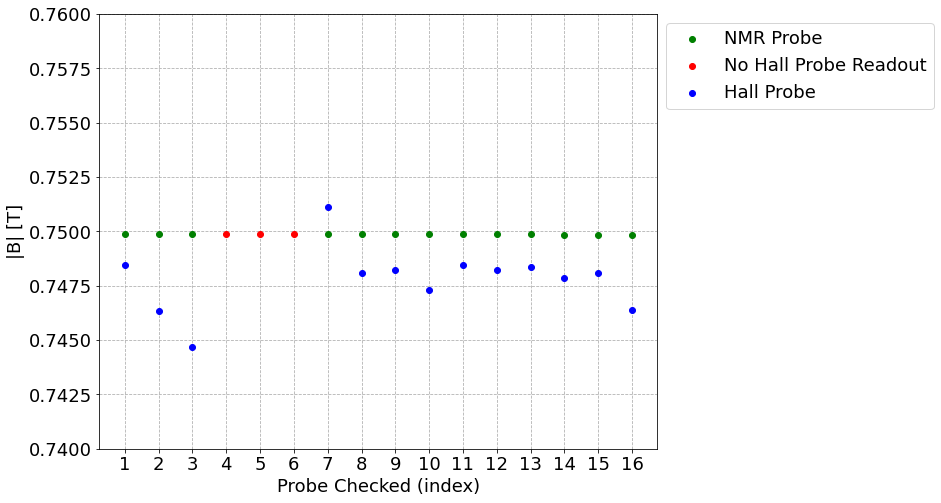

In [73]:
# fill NMR (for plotting)
fig, ax = plt.subplots()

NMR_filled = np.array(data_dict['NMR_filled'])

ax.scatter(inds[~map_no_Hall], NMR_filled[~map_no_Hall], c='green', label='NMR Probe')
ax.scatter(inds[map_no_Hall], NMR_filled[map_no_Hall], c='red', label='No Hall Probe Readout')
ax.scatter(inds, data_dict['Hall_B'], c='blue', label='Hall Probe')

ax.set_ylim([0.74, 0.76])

ax.set_xticks(np.arange(1, 17))

ax.set_xlabel('Probe Checked (index)')
# ax.set_xlabel('Probe #')
ax.set_ylabel('|B| [T]')
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0));

In [60]:
#inds = np.arange(len(data_dict['NMR']))
inds = np.array(data_dict['probe_num'])

In [61]:
inds

array([ 2, 10,  4,  3,  6,  8,  7,  5,  9, 11, 12, 13, 14, 15, 16, 18])

In [62]:
NMR = np.array(data_dict['NMR'])
map_no_Hall = np.isnan(NMR)

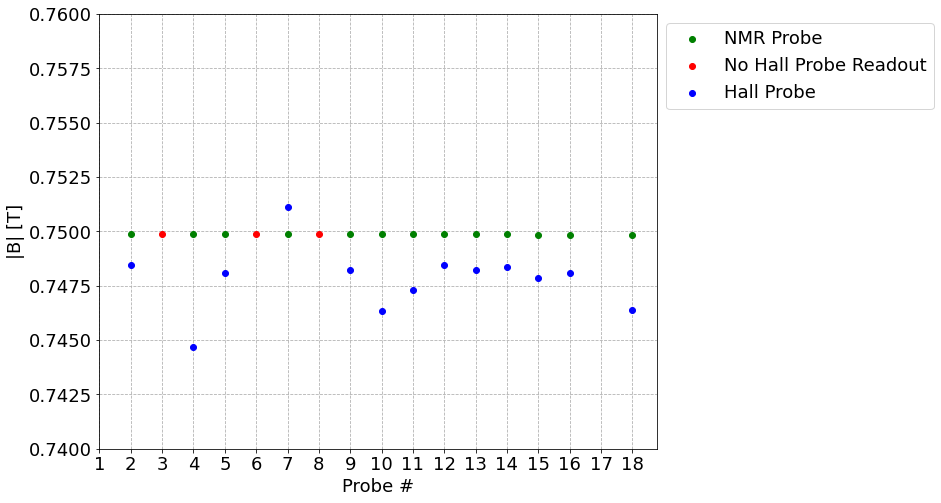

In [64]:
# fill NMR (for plotting)
fig, ax = plt.subplots()

NMR_filled = np.array(data_dict['NMR_filled'])

ax.scatter(inds[~map_no_Hall], NMR_filled[~map_no_Hall], c='green', label='NMR Probe')
ax.scatter(inds[map_no_Hall], NMR_filled[map_no_Hall], c='red', label='No Hall Probe Readout')
ax.scatter(inds, data_dict['Hall_B'], c='blue', label='Hall Probe')

ax.set_ylim([0.74, 0.76])

ax.set_xticks(np.arange(1, 19))

#ax.set_xlabel('Probe Checked (index)')
ax.set_xlabel('Probe #')
ax.set_ylabel('|B| [T]')
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0));

# Stability

## Functions

In [93]:
def get_probe_IDs(df):
    probes = [c[:-6] for c in df.columns if "Raw_X" in c]
    return sorted(probes)

def Hall_probe_basic_calcs(df, probes):
    # magnitudes and angles
    for p in probes:
        for t in ['Raw', 'Cal']:
            df[f'{p}_{t}_Bmag'] = (df[f'{p}_{t}_X']**2 + df[f'{p}_{t}_Y']**2 + df[f'{p}_{t}_Z']**2)**(1/2)
            df[f'{p}_{t}_Theta'] = np.arccos(df[f'{p}_{t}_Z']/df[f'{p}_{t}_Bmag'])
            df[f'{p}_{t}_Phi'] = np.arctan2(df[f'{p}_{t}_Y'],df[f'{p}_{t}_X'])
    # again using theta redefining Cal components
    for p in probes:
        for t in ['Cal']:
            df[f'{p}_{t}_Theta2'] = np.arccos(df[f'{p}_{t}_X']/df[f'{p}_{t}_Bmag'])
            df[f'{p}_{t}_Phi2'] = np.arctan2(df[f'{p}_{t}_Z'],df[f'{p}_{t}_Y'])
    # magnet slow controls
    df['Magnet Resistance [Ohm]'] = df['Magnet Voltage [V]'] / df['Magnet Current [A]']
    df['Coil Resistance [Ohm]'] = 2*df['Magnet Resistance [Ohm]']
    df['Magnet Power [W]'] = df['Magnet Voltage [V]'] * df['Magnet Current [A]']
    # center smaract measured values around zero
    if 'SmarAct_Meas_Angle_1' in df.columns:
        a1 = df.loc[:, 'SmarAct_Meas_Angle_1'].values
        a2 = df.loc[:, 'SmarAct_Meas_Angle_2'].values
        a1[a1 > 180.] = a1[a1 > 180.] - 360.
        a2[a2 > 180.] = a2[a2 > 180.] - 360.
        df.loc[:, 'SmarAct_Meas_Angle_1_Centered'] = a1
        df.loc[:, 'SmarAct_Meas_Angle_2_Centered'] = a2
    ### INTERPOLATE NMR VALUES TO SCAN TIMES
    #### STOPPED HERE 2022-11-29 17:41:36 
    return df

def match_temp_scan_dfs(df_temp, df):
    # assumes scan df is a subset of temp df.
    t0 = df.index[0]
    tf = df.index[-1]
    df_t = df_temp.query(f'"{t0}" <= Datetime <= "{tf}"').copy()
    return df_t

## File Info

In [76]:
ddir = '/home/ckampa/Dropbox/LogFiles/monitoring/'

In [78]:
# 08-07-24 -- magnet restarted, field probes tested, now measuring stability
plotdir = hpc_ext_path+'plots/magnet_stability/2024-08-07/'
slowfile = ddir+'2024-08-07 172432slow.txt'

## Load & Process Data

In [111]:
df = load_data(slowfile)

In [84]:
df

,Time,Magnet Current [A],Magnet Voltage [V],Coil 1,Coil 2,LCW in Coil1,LCW out Coil 1,LCW in Coil 2,LCW out Coil 2,Yoke (near pole),...,8E0000000D51483A_Raw_Y,8E0000000D51483A_Raw_Z,8E0000000D51483A_Raw_T,8E0000000D51483A_Cal_X,8E0000000D51483A_Cal_Y,8E0000000D51483A_Cal_Z,8E0000000D51483A_Cal_T,seconds_delta,hours_delta,days_delta
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-08-07 17:24:33,8/7/2024 5:24:33 PM,130.419580,15.500108,29.183010,28.691052,20.486317,22.011229,20.738895,22.203203,21.595997,...,98856.0,-2070129.0,23078.0,0.741893,0.027479,-0.104621,23.078,0.0,0.000000,0.000000
2024-08-07 17:25:36,8/7/2024 5:25:36 PM,130.419240,15.500062,29.150698,28.662229,20.671055,21.831938,20.653633,22.203045,21.598747,...,102295.0,-2070106.0,22793.0,0.741789,0.028739,-0.104715,22.793,63.0,0.017500,0.000729
2024-08-07 17:30:35,8/7/2024 5:30:35 PM,130.419410,15.503220,29.185472,28.729246,20.339768,21.650103,20.484411,21.986589,21.629475,...,106613.0,-2069852.0,22568.0,0.741613,0.030331,-0.105330,22.568,362.0,0.100556,0.004190
2024-08-07 17:35:35,8/7/2024 5:35:35 PM,130.419240,15.507002,29.238874,28.749388,20.230988,21.749184,20.541563,21.983759,21.652145,...,109280.0,-2069821.0,22444.0,0.741555,0.031309,-0.105522,22.444,662.0,0.183889,0.007662
2024-08-07 17:40:35,8/7/2024 5:40:35 PM,130.419240,15.507323,29.222845,28.731550,21.748732,22.647715,21.408123,23.063902,21.672382,...,111655.0,-2069589.0,22359.0,0.741436,0.032186,-0.105964,22.359,962.0,0.267222,0.011134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-09 11:47:37,8/9/2024 11:47:37 AM,130.419410,15.503593,29.016607,28.719461,20.171307,21.641340,20.363981,21.865869,22.074715,...,111655.0,-2069589.0,22359.0,0.741436,0.032186,-0.105964,22.359,152584.0,42.384444,1.766019
2024-08-09 11:52:41,8/9/2024 11:52:41 AM,130.419297,15.503625,29.018518,28.690126,21.831564,22.771389,21.378538,23.117107,22.072554,...,111655.0,-2069589.0,22359.0,0.741436,0.032186,-0.105964,22.359,152888.0,42.468889,1.769537
2024-08-09 11:57:39,8/9/2024 11:57:39 AM,130.419240,15.501327,28.984631,28.652306,21.489553,22.484051,21.146832,22.833082,22.073536,...,111655.0,-2069589.0,22359.0,0.741436,0.032186,-0.105964,22.359,153186.0,42.551667,1.772986


In [114]:
probes = get_probe_IDs(df)
probe = probes[0]
probe_num = Hall_ID_to_Mu2e[probe]

In [115]:
probes

['8E0000000D51483A']

In [116]:
probe

'8E0000000D51483A'

In [117]:
probe_num

2

In [118]:
df = Hall_probe_basic_calcs(df, probes)

In [119]:
df

,Time,Magnet Current [A],Magnet Voltage [V],Coil 1,Coil 2,LCW in Coil1,LCW out Coil 1,LCW in Coil 2,LCW out Coil 2,Yoke (near pole),...,8E0000000D51483A_Raw_Theta,8E0000000D51483A_Raw_Phi,8E0000000D51483A_Cal_Bmag,8E0000000D51483A_Cal_Theta,8E0000000D51483A_Cal_Phi,8E0000000D51483A_Cal_Theta2,8E0000000D51483A_Cal_Phi2,Magnet Resistance [Ohm],Coil Resistance [Ohm],Magnet Power [W]
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-08-07 17:24:33,8/7/2024 5:24:33 PM,130.419580,15.500108,29.183010,28.691052,20.486317,22.011229,20.738895,22.203203,21.595997,...,2.965148,0.271138,0.749737,1.710797,0.037022,0.144782,-1.313943,0.118848,0.237696,2021.517619
2024-08-07 17:25:36,8/7/2024 5:25:36 PM,130.419240,15.500062,29.150698,28.662229,20.671055,21.831938,20.653633,22.203045,21.598747,...,2.964570,0.279864,0.749694,1.710932,0.038724,0.145354,-1.302942,0.118848,0.237696,2021.506263
2024-08-07 17:30:35,8/7/2024 5:30:35 PM,130.419410,15.503220,29.185472,28.729246,20.339768,21.650103,20.484411,21.986589,21.629475,...,2.963202,0.289701,0.749669,1.711764,0.040876,0.146737,-1.290421,0.118872,0.237744,2021.920806
2024-08-07 17:35:35,8/7/2024 5:35:35 PM,130.419240,15.507002,29.238874,28.749388,20.230988,21.749184,20.541563,21.983759,21.652145,...,2.962591,0.296103,0.749679,1.712021,0.042195,0.147354,-1.282366,0.118901,0.237802,2022.411372
2024-08-07 17:40:35,8/7/2024 5:40:35 PM,130.419240,15.507323,29.222845,28.731550,21.748732,22.647715,21.408123,23.063902,21.672382,...,2.961693,0.301183,0.749661,1.712620,0.043383,0.148268,-1.275905,0.118904,0.237807,2022.453324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-09 11:47:37,8/9/2024 11:47:37 AM,130.419410,15.503593,29.016607,28.719461,20.171307,21.641340,20.363981,21.865869,22.074715,...,2.961693,0.301183,0.749661,1.712620,0.043383,0.148268,-1.275905,0.118875,0.237750,2021.969495
2024-08-09 11:52:41,8/9/2024 11:52:41 AM,130.419297,15.503625,29.018518,28.690126,21.831564,22.771389,21.378538,23.117107,22.072554,...,2.961693,0.301183,0.749661,1.712620,0.043383,0.148268,-1.275905,0.118875,0.237750,2021.971868
2024-08-09 11:57:39,8/9/2024 11:57:39 AM,130.419240,15.501327,28.984631,28.652306,21.489553,22.484051,21.146832,22.833082,22.073536,...,2.961693,0.301183,0.749661,1.712620,0.043383,0.148268,-1.275905,0.118858,0.237715,2021.671243


In [120]:
cols_Hall = [c for c in df.columns if probe in c]

In [121]:
cols_Hall

['8E0000000D51483A_Raw_X',
 '8E0000000D51483A_Raw_Y',
 '8E0000000D51483A_Raw_Z',
 '8E0000000D51483A_Raw_T',
 '8E0000000D51483A_Cal_X',
 '8E0000000D51483A_Cal_Y',
 '8E0000000D51483A_Cal_Z',
 '8E0000000D51483A_Cal_T',
 '8E0000000D51483A_Raw_Bmag',
 '8E0000000D51483A_Raw_Theta',
 '8E0000000D51483A_Raw_Phi',
 '8E0000000D51483A_Cal_Bmag',
 '8E0000000D51483A_Cal_Theta',
 '8E0000000D51483A_Cal_Phi',
 '8E0000000D51483A_Cal_Theta2',
 '8E0000000D51483A_Cal_Phi2']

In [122]:
df[cols_Hall]

,8E0000000D51483A_Raw_X,8E0000000D51483A_Raw_Y,8E0000000D51483A_Raw_Z,8E0000000D51483A_Raw_T,8E0000000D51483A_Cal_X,8E0000000D51483A_Cal_Y,8E0000000D51483A_Cal_Z,8E0000000D51483A_Cal_T,8E0000000D51483A_Raw_Bmag,8E0000000D51483A_Raw_Theta,8E0000000D51483A_Raw_Phi,8E0000000D51483A_Cal_Bmag,8E0000000D51483A_Cal_Theta,8E0000000D51483A_Cal_Phi,8E0000000D51483A_Cal_Theta2,8E0000000D51483A_Cal_Phi2
Datetime,,,,,,,,,,,,,,,,
2024-08-07 17:24:33,355618.0,98856.0,-2070129.0,23078.0,0.741893,0.027479,-0.104621,23.078,2.102777e+06,2.965148,0.271138,0.749737,1.710797,0.037022,0.144782,-1.313943
2024-08-07 17:25:36,355924.0,102295.0,-2070106.0,22793.0,0.741789,0.028739,-0.104715,22.793,2.102971e+06,2.964570,0.279864,0.749694,1.710932,0.038724,0.145354,-1.302942
2024-08-07 17:30:35,357657.0,106613.0,-2069852.0,22568.0,0.741613,0.030331,-0.105330,22.568,2.103229e+06,2.963202,0.289701,0.749669,1.711764,0.040876,0.146737,-1.290421
2024-08-07 17:35:35,358211.0,109280.0,-2069821.0,22444.0,0.741555,0.031309,-0.105522,22.444,2.103430e+06,2.962591,0.296103,0.749679,1.712021,0.042195,0.147354,-1.282366
2024-08-07 17:40:35,359444.0,111655.0,-2069589.0,22359.0,0.741436,0.032186,-0.105964,22.359,2.103536e+06,2.961693,0.301183,0.749661,1.712620,0.043383,0.148268,-1.275905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-09 11:47:37,359444.0,111655.0,-2069589.0,22359.0,0.741436,0.032186,-0.105964,22.359,2.103536e+06,2.961693,0.301183,0.749661,1.712620,0.043383,0.148268,-1.275905
2024-08-09 11:52:41,359444.0,111655.0,-2069589.0,22359.0,0.741436,0.032186,-0.105964,22.359,2.103536e+06,2.961693,0.301183,0.749661,1.712620,0.043383,0.148268,-1.275905
2024-08-09 11:57:39,359444.0,111655.0,-2069589.0,22359.0,0.741436,0.032186,-0.105964,22.359,2.103536e+06,2.961693,0.301183,0.749661,1.712620,0.043383,0.148268,-1.275905


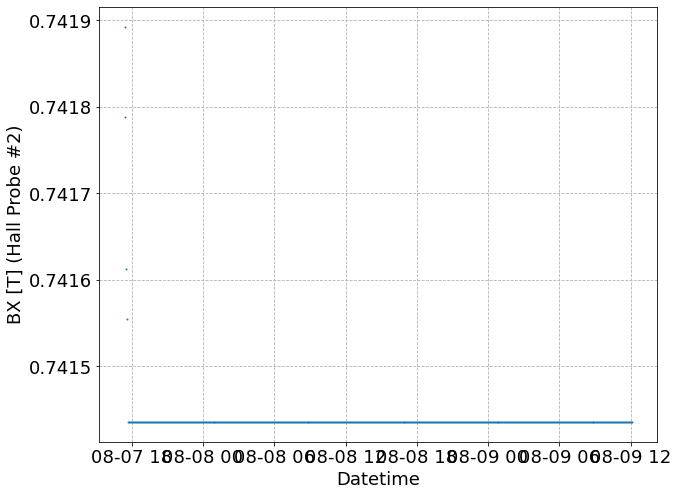

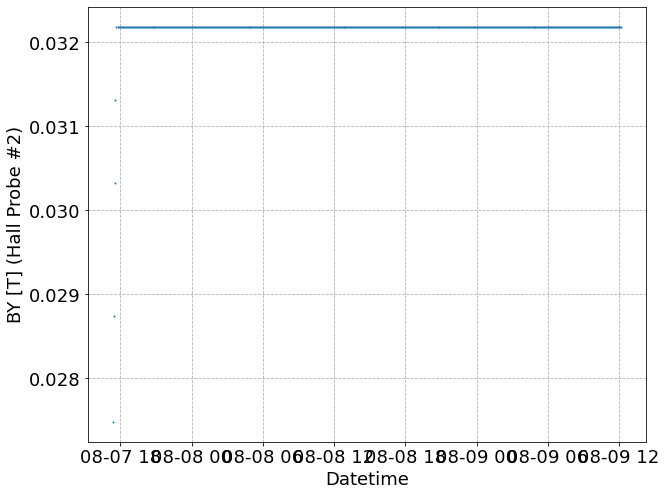

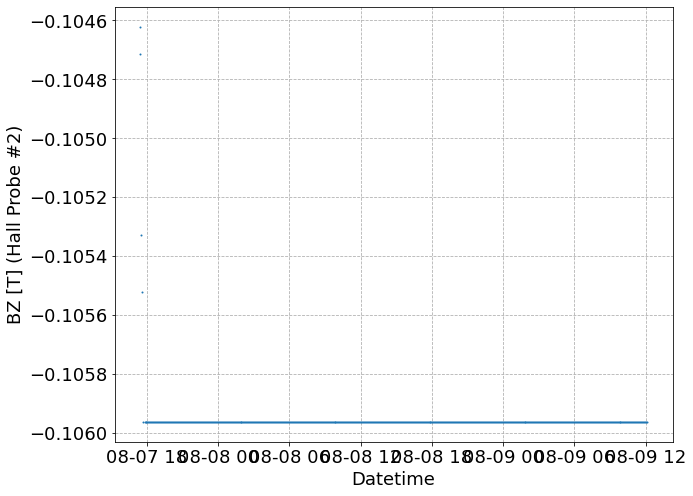

In [123]:
# inspect field components (calibrated)
for i in ['X', 'Y', 'Z']:
    fig, ax = plt.subplots()
    ax.scatter(df.index, df[f'{probe}_Cal_{i}'], s=1)
    ax.set_xlabel('Datetime')
    ax.set_ylabel(f'B{i} [T] (Hall Probe #{probe_num})')

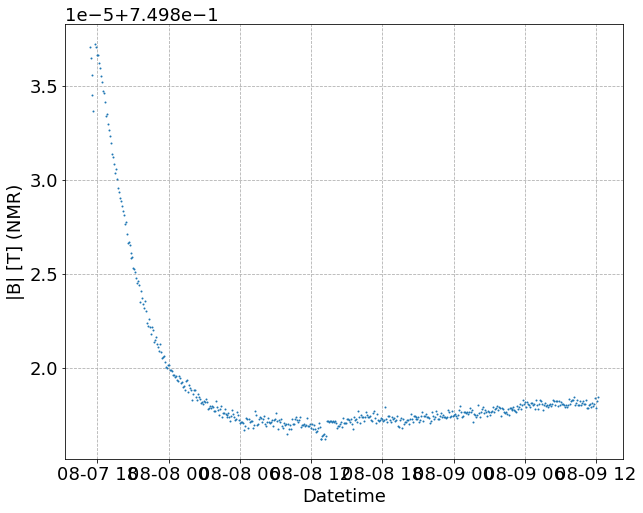

In [127]:
t0_ = '08-07-24 00:00' # start of run
# t0_ = '08-07-24 18:00' # let initial equilibration happen
# tf_ = '08-07-24 18:00' # inspecting when Hall probe becomes constant
tf_ = '01-01-30 00:00' # end of run
df_ = df.query(f"'{t0_}' <= Datetime <= '{tf_}'").copy()

fig, ax = plt.subplots()

ax.scatter(df_.index, df_['NMR [T]'], s=1)
ax.set_xlabel("Datetime")
ax.set_ylabel("|B| [T] (NMR)");

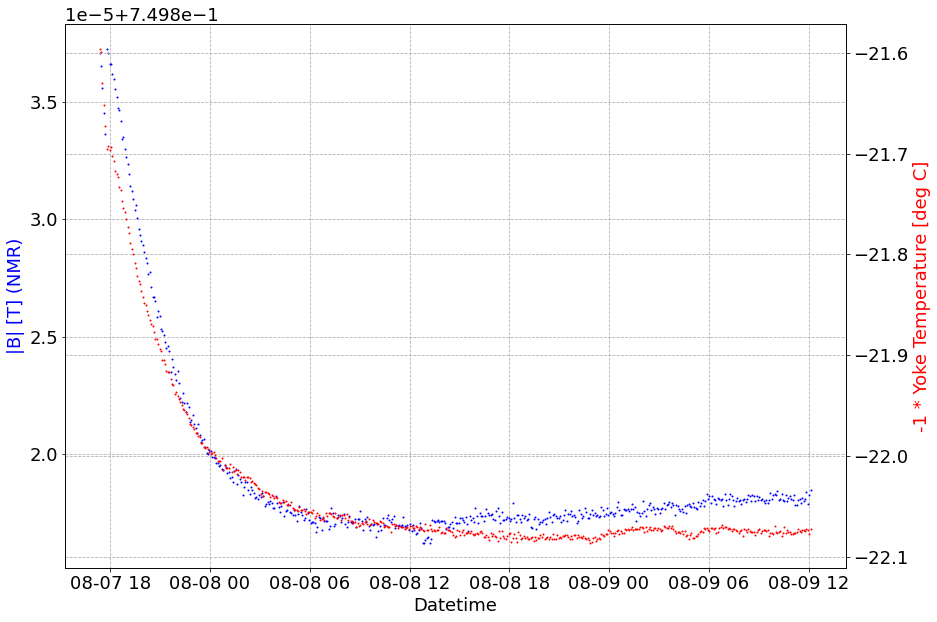

In [133]:
t0_ = '08-07-24 00:00' # start of run
# t0_ = '08-07-24 18:00' # let initial equilibration happen
# tf_ = '08-07-24 18:00' # inspecting when Hall probe becomes constant
tf_ = '01-01-30 00:00' # end of run
df_ = df.query(f"'{t0_}' <= Datetime <= '{tf_}'").copy()

fig, ax = plt.subplots(figsize=(14, 10))
ax2 = ax.twinx()

ax2.scatter(df_.index, -1*df_['Yoke (near pole)'], s=1, c='red')
ax.scatter(df_.index, df_['NMR [T]'], s=1, c='blue')

ax.yaxis.label.set_color('blue')
ax2.yaxis.label.set_color('red')

ax.set_xlabel("Datetime")
ax.set_ylabel("|B| [T] (NMR)")
ax2.set_ylabel("-1 * Yoke Temperature [deg C]");

Text(0.5, 1.0, '|B| Comparisons for Hall Probe #2 (8E0000000D51483A)\n')

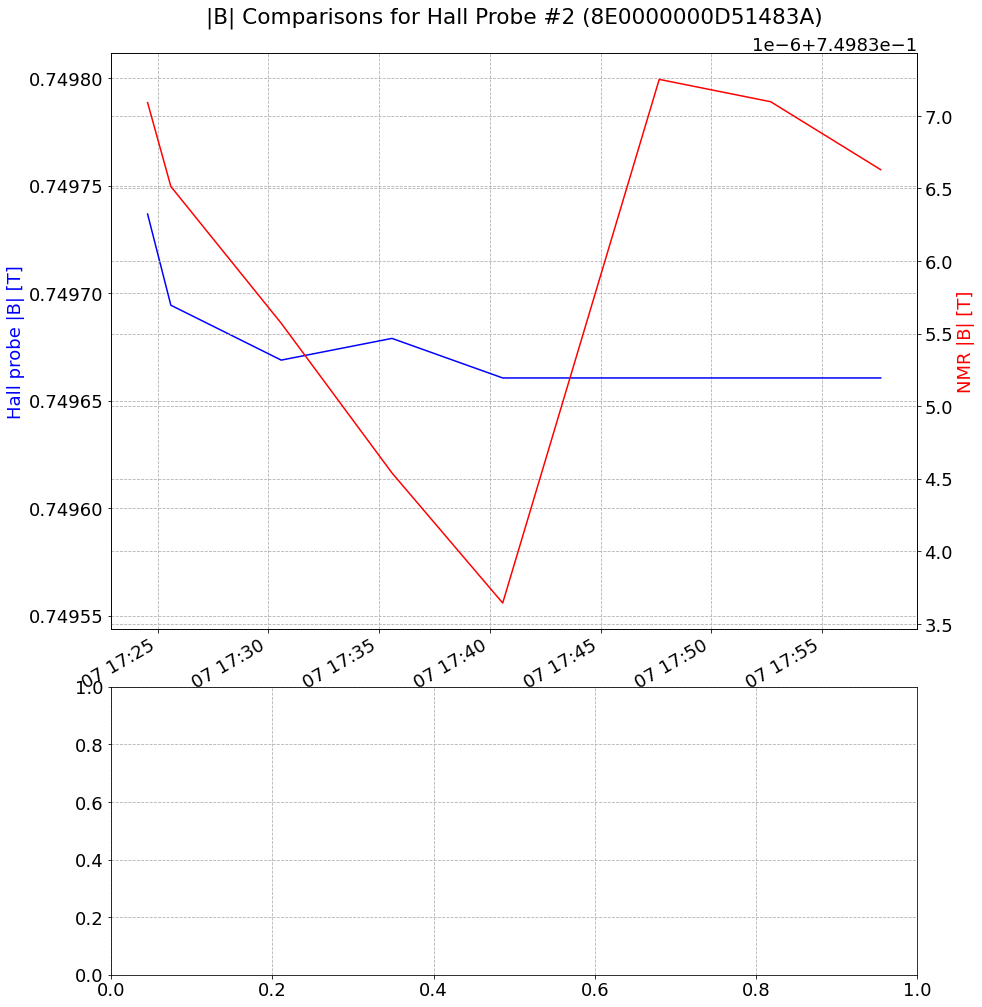

In [126]:
t0_ = '08-07-24 00:00' # start of run
#t0_ = '08-07-24 18:00' # let initial equilibration happen
tf_ = '08-07-24 18:00' # inspecting when Hall probe becomes constant
#tf_ = '01-01-30 00:00' # end of run
df_ = df.query(f"'{t0_}' <= Datetime <= '{tf_}'").copy()

fig = plt.figure(figsize=(14, 16))
ax = plt.axes([0.1, 0.4, 0.8, 0.5])
ax2 = ax.twinx()
ax3 = plt.axes([0.1, 0.1, 0.8, 0.25])
###ax4 = ax3.twinx()
df_[f'{probe}_Cal_Bmag'].plot(ax=ax, color='blue')
df_['NMR [T]'].plot(ax=ax2, color='red')
# ax3.scatter([])
# df_['SmarAct_Meas_Angle_2_Centered'].plot(ax=ax3, color='black', linestyle='None', marker='.')
# df_['SmarAct_Meas_Angle_1_Centered'].plot(ax=ax4, color='green')

# limits
ymean = df_[f'{probe}_Cal_Bmag'].mean()
ystd = df_[f'{probe}_Cal_Bmag'].std()
ax.set_ylim(ymean-5*ystd, ymean+5*ystd)
# labels
ax.set_ylabel(f'Hall probe |B| [T]')
ax.yaxis.label.set_color('blue')
ax2.set_ylabel(f'NMR |B| [T]')
ax2.yaxis.label.set_color('red')
ax.set_title(f"|B| Comparisons for Hall Probe #{probe_num} ({probe})\n")

In [108]:
df_[f'{probe}_Cal_Bmag'].describe()

count    5.060000e+02
mean     7.496606e-01
std      2.222643e-16
min      7.496606e-01
25%      7.496606e-01
50%      7.496606e-01
75%      7.496606e-01
max      7.496606e-01
Name: 8E0000000D51483A_Cal_Bmag, dtype: float64

In [109]:
df[f'{probe}_Cal_Bmag'].describe()

count    514.000000
mean       0.749661
std        0.000004
min        0.749661
25%        0.749661
50%        0.749661
75%        0.749661
max        0.749737
Name: 8E0000000D51483A_Cal_Bmag, dtype: float64

In [101]:
df_['NMR [T]']

Datetime
2024-08-07 18:02:38    0.749837
2024-08-07 18:07:42    0.749836
2024-08-07 18:12:43    0.749836
2024-08-07 18:17:41    0.749836
2024-08-07 18:22:41    0.749835
                         ...   
2024-08-09 11:47:37    0.749818
2024-08-09 11:52:41    0.749818
2024-08-09 11:57:39    0.749818
2024-08-09 12:02:42    0.749818
2024-08-09 12:07:40    0.749818
Name: NMR [T], Length: 506, dtype: float64